In [2]:
import pandas as pd
import glob
import os
from matplotlib import pyplot as plt
import pandas as pd
import numpy as np
from scipy import signal
import pdb
import time
import calendar
import pyfftw
from tqdm.notebook import tqdm
from comb_utils import *

In [5]:
from scipy.integrate import ode
from scipy.integrate import solve_ivp as solve
from scipy.integrate import BDF

ω_start = 193.4160363481703 THz, ω_end = 193.41216805838968 THz
λ_start = 1549.9876000991992 nm, λ_end = 1550.0186002232026 nm
normalized detunings = [ -8 , 12 ] (relevant parameters: δnorm_range)
sweep speed (ω space) = 386828.97806249995 GHz/s 
sweep speed (λ space) = 3100.0124003302817 nm/s
real time = 1e-05, normalized time = 1934.1448903225807 (relevant parameters: total_time), dt = 0.0005
Simulation points = 257885985.0 (relevant parameters: dt)
detuning at start = -1.54731591225 GHz, detuning at end = 2.320973868375 GHz (relevant parametes: ω_range, λ_range)
Dint is a polynomial of order 8.
g0 = 0.42497332143241495, Veff = 8.670795723907829e-16, F^2 = 17.728362327879115


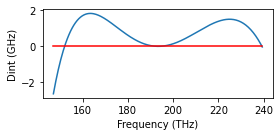

In [4]:
A = microring()

In [6]:
A.pump

0.2

In [10]:
y0

0.0

In [134]:
A.Δωtot/4

96707244.51612903

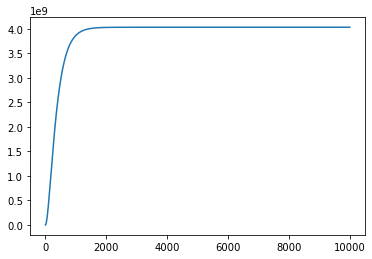

In [277]:
δ=A.Δωtot*0
δ2 = A.Δωtot*100*0
def dAdt(t,y):
#     print(y,t)
    imag = -1*A.Δωtot*y[0]-1j*(δ)*y[1]+np.sqrt(A.Δωext*2*A.pump/A.h/A.ω0)#+np.sqrt(A.Δωext*2*A.pump/A.h/A.ω0)*np.cos(t*δ2)#+np.sqrt(A.Δωext*2*A.pump/A.h/A.ω0)*np.exp(1j*(δ2))#A.ω0-A.ω0#-1j*(δ2)*y[1]
    real = -1*A.Δωtot*y[1]-1j*(δ)*y[0]#+np.sqrt(A.Δωext*2*A.pump/A.h/A.ω0)*np.sin(t*δ2)#A.ω0-A.ω0
    return [imag,real]
y0,t0 = [0.0j,0.0],0
# sol = solve(lambda t, y: dAdt(t,y,self.lasers,self.modes,l),(0,1e-8), y0=y0, method='LSODA')
r = ode(dAdt).set_integrator('zvode', method='bdf')
r.set_initial_value(y0, t0)
t1 = 1e-7
dt = 1e-11
sol = []
while r.successful() and r.t < t1:
    sol.append(r.integrate(r.t+dt))
plt.plot((np.abs(np.array(sol).sum(axis=1))**2))

In [162]:
r.set_initial_value(y0, t0)#.set_f_params(2.0).set_jac_params(2.0)

In [163]:
t1 = 1e-7
dt = 1e-10
sol = []
while r.successful() and r.t < t1:
    sol.append(r.integrate(r.t+dt))

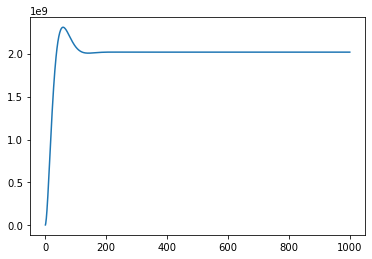

In [164]:
plt.plot(np.abs(np.array(sol).sum(axis=1))**2)